# **Facebook Ego Network Link Prediction**

## **Importing Necessary Libraries**

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
ed=pd.read_csv("0.edges")

In [ ]:
l=[]
for i in np.array(ed):
    #print(i[0])
    l.append(list(i[0].split(" ")))
g = nx.Graph()
g1= nx.Graph()
g2= nx.Graph()

for i in l:
    i.append('1')

val_set=pd.DataFrame(l)

### **Jaccard Coefficient**

In [ ]:
jaccard_train=nx.jaccard_coefficient(g,edges)

In [ ]:
ll3=[]
for i in jaccard_train:
    ll3.append(i)
  
set2=pd.DataFrame(ll)
set2['3']=pd.DataFrame(ll1)[2]/6000
set2['4']=pd.DataFrame(ll2)[2]
set2['5']=pd.DataFrame(ll3)[2]
set2[2]=set2[2]/18

In [ ]:
set2.head()

,0,1,2,3,4,5
0,236,186,0.218739,0.258000,0.351658,0.234375
1,122,285,0.470997,0.475333,0.766349,0.421053
2,24,346,0.262757,0.065000,0.729288,0.518519
3,271,304,0.521765,0.648000,0.874706,0.384615
4,176,9,0.152752,0.121333,0.286133,0.169492


In [ ]:
g1.add_nodes_from(test_set[1])
g1.add_nodes_from(test_set[2])

In [ ]:
edges1 =list(np.array(test_set.iloc[: , 0:2]))
g1.add_edges_from(edges1)

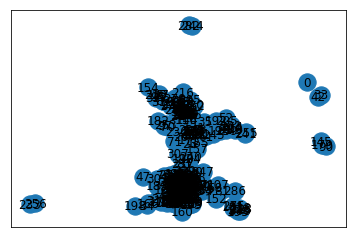

In [ ]:
nx.draw_networkx(g1)

# **Supervised Learning Algorithms**

Link prediction using following ML algorithms:

*   Random Forest
*   Support Vector Classifier
*   Gaussian Naïve Bayes
*   K - Nearest Neighbours



# **Train-Test Split**


In [ ]:
from gae.preprocessing import mask_test_edges
np.random.seed(0) # setting SEED value for train-test split
adj_sparse = nx.to_scipy_sparse_matrix(g)

# Perform train-test split
adj_train, train_edges, val_edges, val_edges_false,test_edges, test_edges_false = mask_test_edges(adj_sparse)
g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges

# **Random Forest Algorithm**




In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0).fit(set2[2:],train_set[2][2:])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(set2[2:])
y_true=train_set[2][2:]
accuracy_score(y_true, y_pred)


0.7605242255758539

# **Support Vector Classifier (SVC) Algorithm**

In [ ]:
import numpy as np
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(set2[2:],train_set[2][2:])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=clf.predict(set2[2:])
y_true=train_set[2][2:]
accuracy_score(y_true, y_pred)

0.8893963463065926

# **Gaussian Naïve Bayes Algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
y_pred = gnb.fit(set2[2:],train_set[2][2:]).predict(set2[2:])

In [ ]:
y_pred=gnb.predict(set2[2:])
y_true=train_set[2][2:]
accuracy_score(y_true, y_pred)

0.7494042891183479

# **K - Nearest Neighbours (KNN) Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(set2[2:],train_set[2][2:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred=neigh.predict(set2[2:])
y_true=train_set[2][2:]
accuracy_score(y_true, y_pred)

0.8147339158061954

# **Accuracy Comparison**

In [ ]:
acc = ["KNN","Gaussian Naive Bayes","SVC","Random Forest"]
model = [81.47,74.94,88.93,76.05]

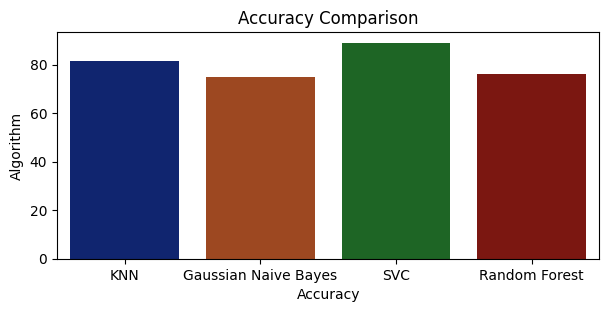

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[7,3],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')